<a href="https://colab.research.google.com/github/Yashasvi-30/Pattern-Recognition-Lab-Codes/blob/main/PatternRecognition_RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You have preprocess data and then implement regression on the data .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Loading my datset
df = pd.read_csv("employee_data_large.csv")
print(df.head())


   EmployeeID  Experience  Salary  Age  Education  PerformanceScore
0           1           7  109479   33         12                 5
1           2          20   59457   55         14                 1
2           3          15  106557   54         17                 1
3           4          11  117189   44         12                 3
4           5           8  118953   45         15                 2


In [ ]:

print("Dataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Step 2: Data Cleaning - Checking for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   EmployeeID        50 non-null     int64
 1   Experience        50 non-null     int64
 2   Salary            50 non-null     int64
 3   Age               50 non-null     int64
 4   Education         50 non-null     int64
 5   PerformanceScore  50 non-null     int64
dtypes: int64(6)
memory usage: 2.5 KB
None

Summary Statistics:
       EmployeeID  Experience         Salary        Age  Education  \
count    50.00000   50.000000      50.000000  50.000000  50.000000   
mean     25.50000   10.860000   78810.100000  42.500000  15.000000   
std      14.57738    5.785309   23825.083587  11.498447   2.466097   
min       1.00000    1.000000   41016.000000  22.000000  12.000000   
25%      13.25000    7.000000   55353.750000  34.000000  13.000000   
50%      25.50000   11.000000   7

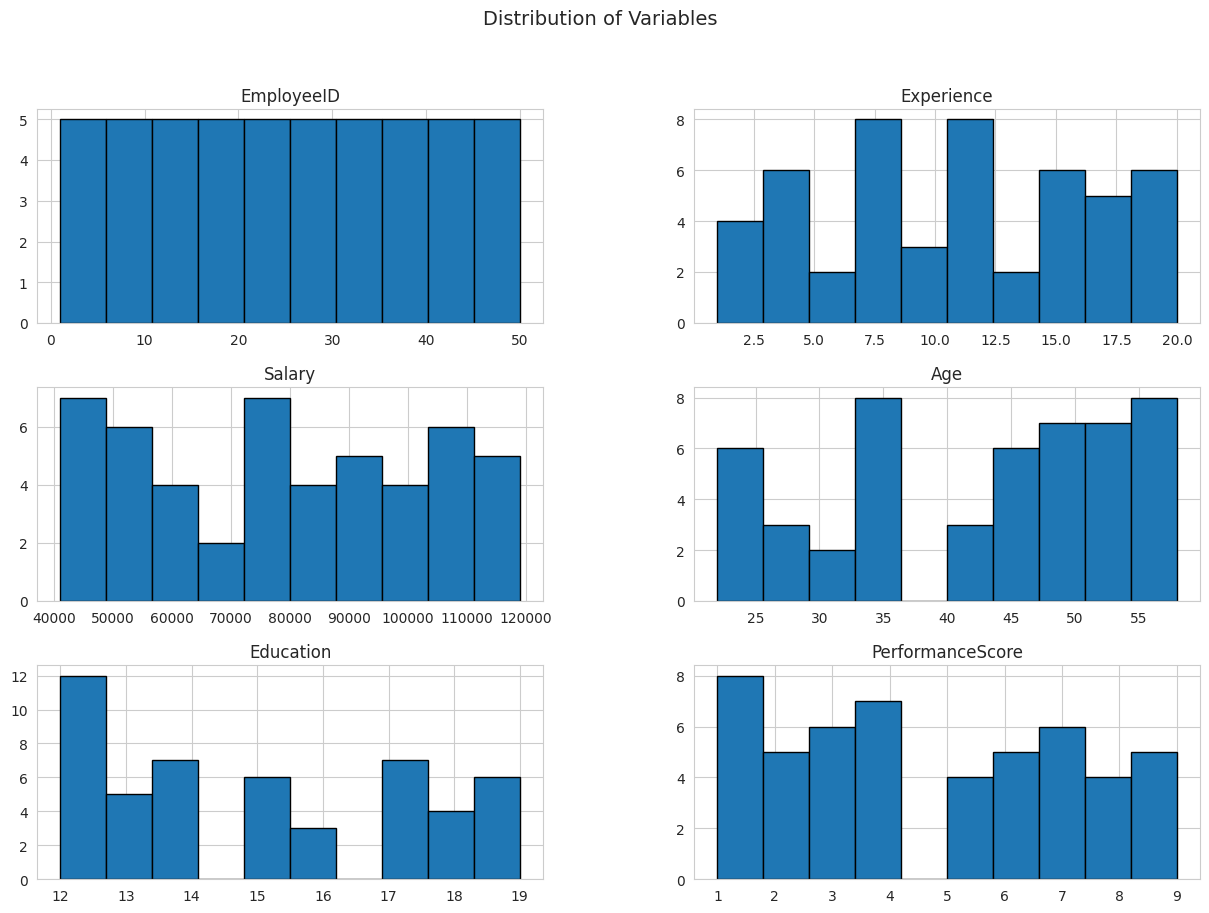

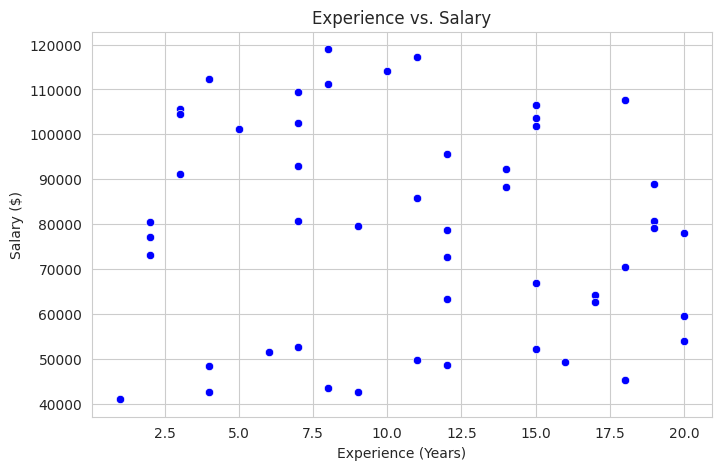

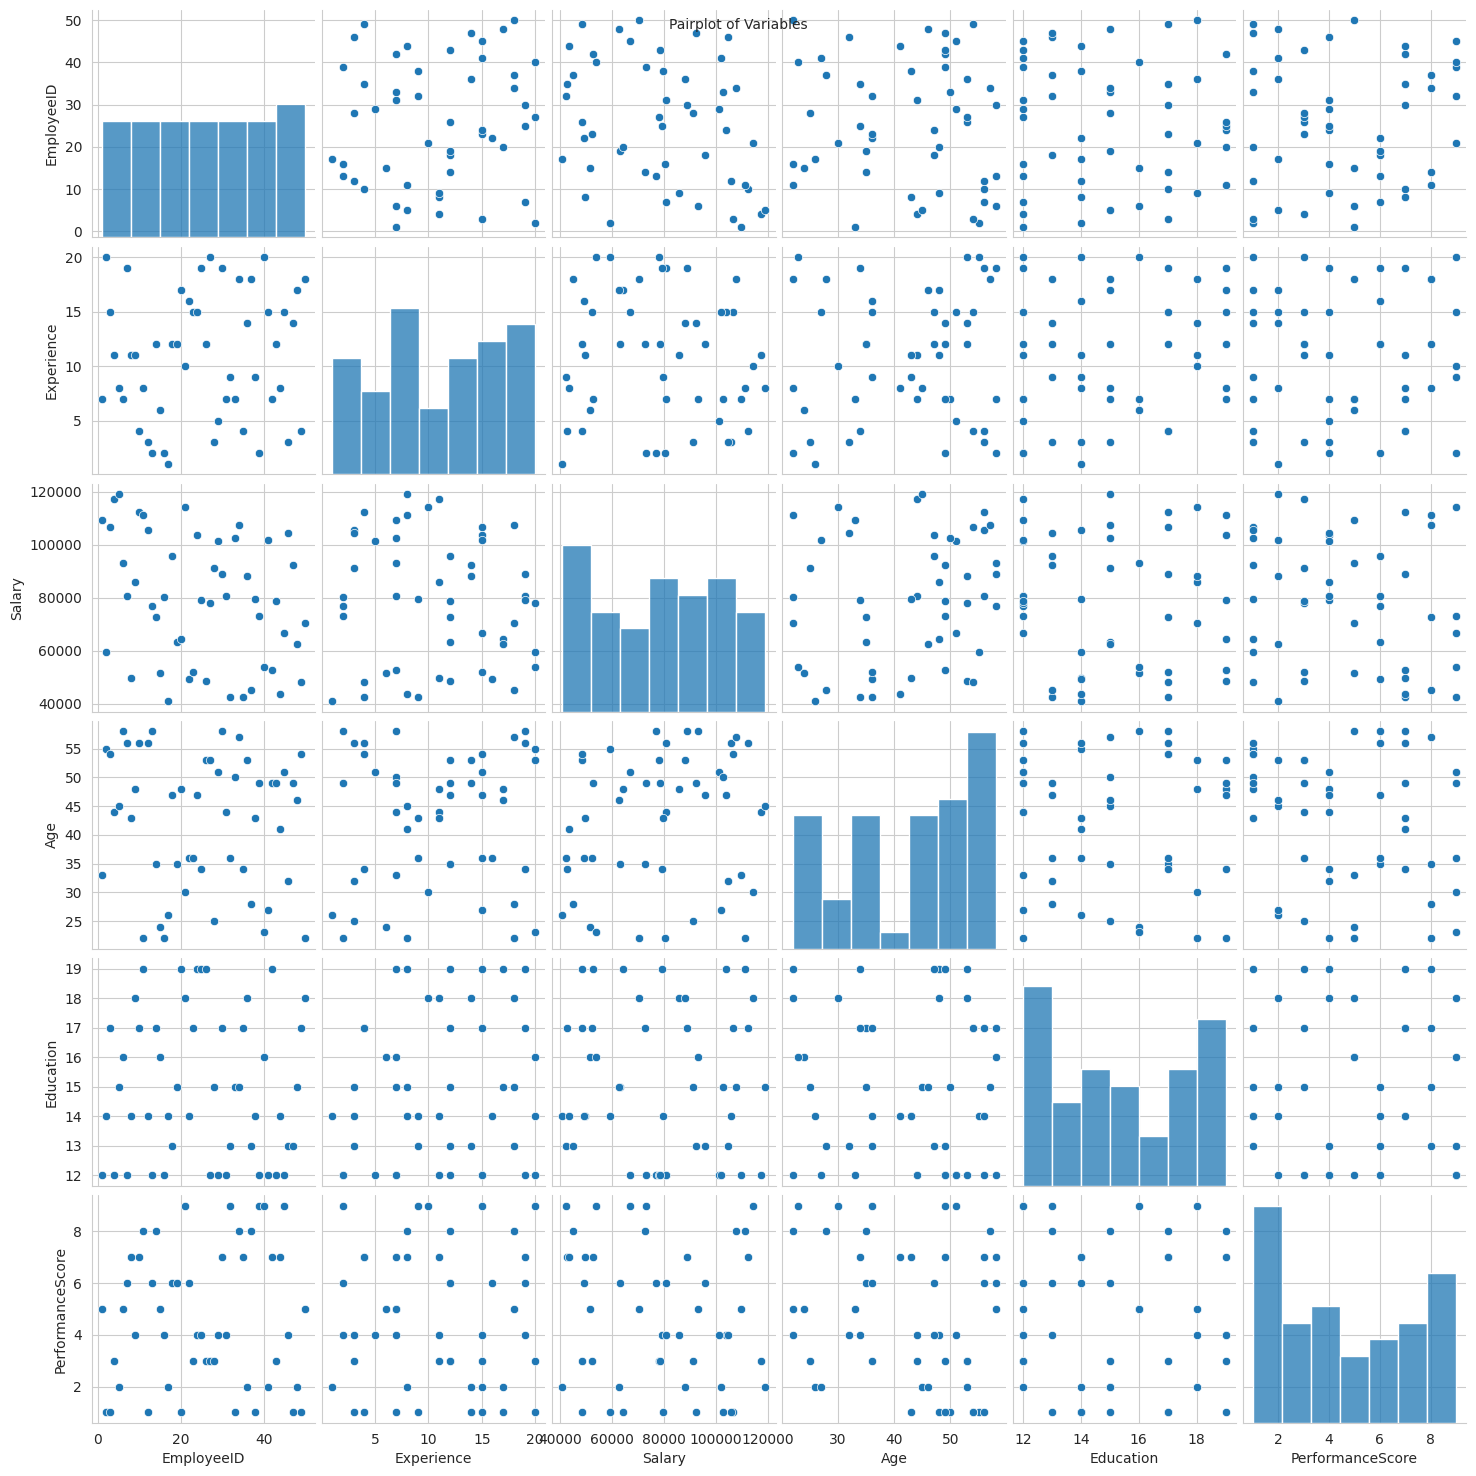

In [ ]:


# Set the style
sns.set_style("whitegrid")

# Histograms f
df.hist(figsize=(15, 10), edgecolor="black")
plt.suptitle("Distribution of Variables", fontsize=14)
plt.show()

# Scatter plot for Experience vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Experience"], y=df["Salary"], color="blue")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.title("Experience vs. Salary")
plt.show()

# Pairplot for multiple regression relationships
sns.pairplot(df)
plt.suptitle("Pairplot of Variables", fontsize=10)
plt.show()


Mean Squared Error: 416133992.208145
R-squared Score: -0.02327089288013351
Coefficient: -166.16683759360674
Intercept: 81560.73933319144


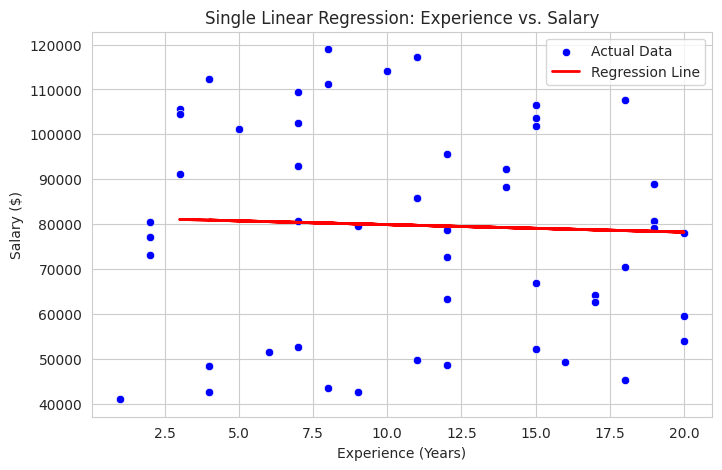

In [ ]:

# Single Linear Regression (Salary vs Experience)
X_single = df[["Experience"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

model_single = LinearRegression()
model_single.fit(X_train, y_train)

y_pred = model_single.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Coefficient: {model_single.coef_[0]}")
print(f"Intercept: {model_single.intercept_}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Experience"], y=df["Salary"], color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.title("Single Linear Regression: Experience vs. Salary")
plt.legend()
plt.show()


Mean Squared Error: 686518576.4796116
R-squared Score: -0.6881449001688653
Coefficients: [ -496.93703255   546.86212977  1418.40758392 -2022.15236624]
Intercept: 50645.16288137211


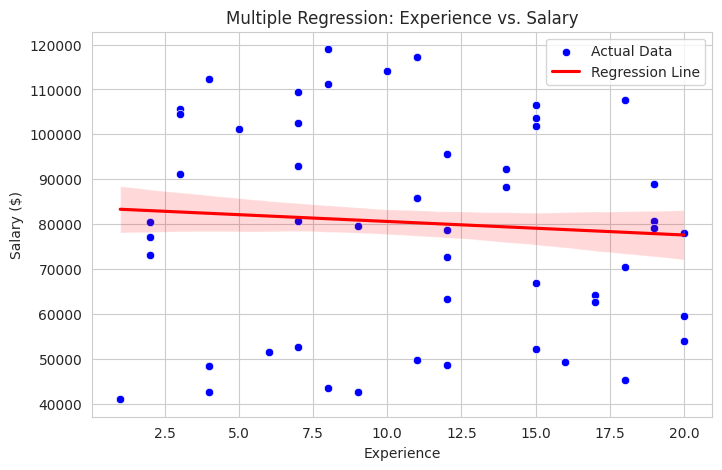

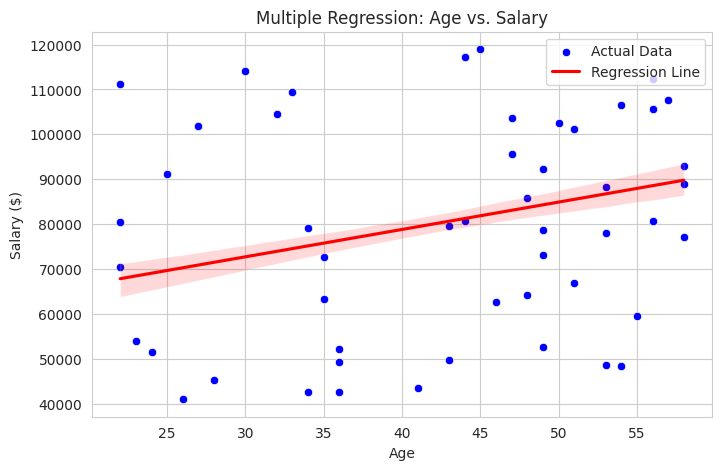

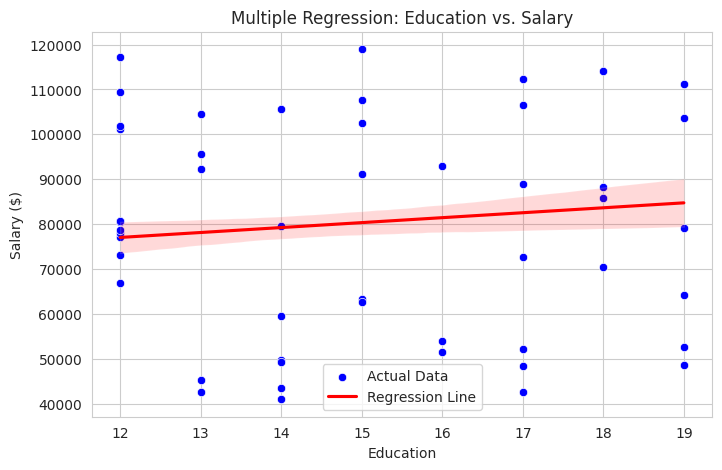

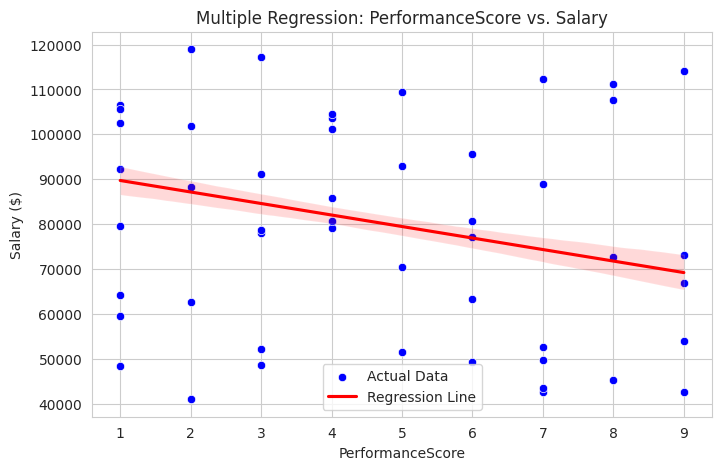

In [ ]:
X = df[["Experience", "Age", "Education", "PerformanceScore"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Make predictions
y_pred = model_multi.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model coefficients
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Coefficients: {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_}")

features = ["Experience", "Age", "Education", "PerformanceScore"]
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["Salary"], color="blue", label="Actual Data")
    sns.regplot(x=df[feature], y=model_multi.predict(df[features]), scatter=False, color="red", label="Regression Line")
    plt.xlabel(feature)
    plt.ylabel("Salary ($)")
    plt.title(f"Multiple Regression: {feature} vs. Salary")
    plt.legend()
    plt.show()